In [8]:
# Importing all dependencies
import json
import requests as req
import seaborn as sns
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from citipy import citipy

In [9]:
# I will start creating a list of random latitudes and longitudes zones (using intervals of 10)
latitudes = np.arange(-90, 90, 10)
longitudes = np.arange(-180, 180, 10)

# will send the info to a dataframe
cities_df = pd.DataFrame()

# Columns for dataframe
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["City"] = ""
cities_df["Country"] = ""

# In order to get latitud and longitud I will use a FOR LOOP
for coord_lat in latitudes:
    
    for coord_lon in longitudes:
        # Get list of latitude and longitude values (0.01 for value to 2 decimal places)
        latitude_value = list(np.arange(coord_lat, coord_lat + 15, 0.01))
        longitude_value = list(np.arange(coord_lon, coord_lon + 15, 0.01))
        
        # Random latitude and longitude values 
        random_lats = random.sample(latitude_value, 50)
        random_lons = random.sample(longitude_value, 50)
        
        # Sample of latitude and longitude values
        lat_samples = [coord_lat + lat for lat in random_lats]
        lon_samples = [coord_lon + lon for lon in random_lons]
        
        # Store values in dataframe created
        cities_df = cities_df.append(pd.DataFrame.from_dict({
            "Latitude": lat_samples, 
            "Longitude": lon_samples}))

cities_df = cities_df.reset_index(drop=True)
cities_df.head()


C:\Users\CAEAIZPU\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,City,Country,Latitude,Longitude
0,NaN,NaN,-168.64,-360.00
1,NaN,NaN,-178.48,-350.92
2,NaN,NaN,-171.50,-346.83
3,NaN,NaN,-165.60,-346.77
4,NaN,NaN,-178.74,-351.68


In [10]:
# FOR LOOP to locate the neareast city based on latitude and longitude stored in dataframe
for column, row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_df.set_value(column, "City", city.city_name)
    cities_df.set_value(column, "Country", city.country_code)

# TAble manipulation to remove values of Latitude and Longitude to get city names and countries only
new_cities_df = cities_df.drop(["Latitude", "Longitude"], axis=1)

# Remove duplicate cities and keep unique cities and countries only
new_cities_df = new_cities_df.drop_duplicates()
new_cities_df.head()

C:\Users\CAEAIZPU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\CAEAIZPU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


,City,Country
0,vaini,to
451,mataura,pf
500,punta arenas,cl
510,ushuaia,ar
900,bredasdorp,za


In [11]:
# Choose 500 random cities based on longitude and latitude
random_cities_df = new_cities_df.sample(500)

# Reset index
random_cities_df = random_cities_df.reset_index(drop=True)
random_cities_df.head()

,City,Country
0,shawinigan,ca
1,lemgo,de
2,lavrentiya,ru
3,maridi,sd
4,katsuura,jp


In [12]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather"

params = {"appid": "a05496c21aae254fbb9d59c296ae5627",
          "units": "metric"}

# Use 'for' loop to retrieve weather info by rows in dataframe
for column, row in random_cities_df.iterrows():
    
    # Reference rows for 'q' param
    params["q"] = f'{row["City"]}, {row["Country"]}'
    
    # Get and print links for each city
    print(f'Weather information for {params["q"]}')
    weather_response = req.get(url, params)
    print(weather_response.url)
    weather_response  = weather_response.json()
    
    # Get weather data and input into dataframe
    random_cities_df.set_value(column, "Latitude", weather_response.get("coord", {}).get("lat"))
    random_cities_df.set_value(column, "Longitude", weather_response.get("coord", {}).get("lon"))
    random_cities_df.set_value(column, "Temperature", weather_response.get("main", {}).get("temp_max"))
    random_cities_df.set_value(column, "Wind Speed", weather_response.get("wind", {}).get("speed"))
    random_cities_df.set_value(column, "Humidity", weather_response.get("main", {}).get("humidity"))
    random_cities_df.set_value(column, "Cloudiness", weather_response.get("clouds", {}).get("all"))

Weather information for shawinigan, ca
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=shawinigan%2C+ca
Weather information for lemgo, de
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=lemgo%2C+de
Weather information for lavrentiya, ru


C:\Users\CAEAIZPU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\CAEAIZPU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\CAEAIZPU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\CAEAIZPU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\CAEAIZPU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_v

http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=lavrentiya%2C+ru
Weather information for maridi, sd
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=maridi%2C+sd
Weather information for katsuura, jp
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=katsuura%2C+jp
Weather information for tiruvottiyur, in
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=tiruvottiyur%2C+in
Weather information for vaitupu, wf
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=vaitupu%2C+wf
Weather information for miandrivazo, mg
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=miandrivazo%2C+mg
Weather information for kilkis, gr
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d5

http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=kayunga%2C+ug
Weather information for brosteni, ro
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=brosteni%2C+ro
Weather information for la ronge, ca
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=la+ronge%2C+ca
Weather information for omboue, ga
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=omboue%2C+ga
Weather information for cape town, za
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=cape+town%2C+za
Weather information for singkawang, id
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=singkawang%2C+id
Weather information for talagang, pk
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae

http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=ossora%2C+ru
Weather information for sarata, ua
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=sarata%2C+ua
Weather information for winnemucca, us
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=winnemucca%2C+us
Weather information for rio pardo, br
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=rio+pardo%2C+br
Weather information for mwinilunga, zm
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=mwinilunga%2C+zm
Weather information for anadyr, ru
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=anadyr%2C+ru
Weather information for vanimo, pg
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae562

http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=kavaratti%2C+in
Weather information for steinhagen, de
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=steinhagen%2C+de
Weather information for mana, gf
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=mana%2C+gf
Weather information for volgodonsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=volgodonsk%2C+ru
Weather information for inta, ru
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=inta%2C+ru
Weather information for nishihara, jp
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=nishihara%2C+jp
Weather information for ampanihy, mg
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&u

http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=bela+pod+bezdezem%2C+cz
Weather information for senador guiomard, br
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=senador+guiomard%2C+br
Weather information for kafue, zm
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=kafue%2C+zm
Weather information for kawalu, id
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=kawalu%2C+id
Weather information for kokkola, fi
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=kokkola%2C+fi
Weather information for semme, sn
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=semme%2C+sn
Weather information for xingyi, cn
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c2

http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=vavuniya%2C+lk
Weather information for nasirabad, in
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=nasirabad%2C+in
Weather information for bacolod, ph
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=bacolod%2C+ph
Weather information for safaga, eg
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=safaga%2C+eg
Weather information for vostok, ru
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=vostok%2C+ru
Weather information for lasa, cn
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=lasa%2C+cn
Weather information for pasni, pk
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=

http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=paracuru%2C+br
Weather information for edea, cm
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=edea%2C+cm
Weather information for horsham, au
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=horsham%2C+au
Weather information for san juan bautista, pe
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=san+juan+bautista%2C+pe
Weather information for zhumadian, cn
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=zhumadian%2C+cn
Weather information for devils lake, us
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=devils+lake%2C+us
Weather information for piranhas, br
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae2

http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=cape+coast%2C+gh
Weather information for copiapo, cl
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=copiapo%2C+cl
Weather information for balimo, pg
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=balimo%2C+pg
Weather information for oriximina, br
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=oriximina%2C+br
Weather information for mkushi, zm
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=mkushi%2C+zm
Weather information for ituiutaba, br
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=ituiutaba%2C+br
Weather information for yirol, sd
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&uni

http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=upington%2C+za
Weather information for miranorte, br
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=miranorte%2C+br
Weather information for kapaa, us
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=kapaa%2C+us
Weather information for grafton, au
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=grafton%2C+au
Weather information for antalaha, mg
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=antalaha%2C+mg
Weather information for rancho palos verdes, us
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=rancho+palos+verdes%2C+us
Weather information for biloela, au
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae25

http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=little+elm%2C+us
Weather information for thinadhoo, mv
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=thinadhoo%2C+mv
Weather information for oyek, ru
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=oyek%2C+ru
Weather information for kamenka, ru
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=kamenka%2C+ru
Weather information for hoa binh, vn
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=hoa+binh%2C+vn
Weather information for husavik, is
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae5627&units=metric&q=husavik%2C+is
Weather information for plettenberg bay, za
http://api.openweathermap.org/data/2.5/weather?appid=a05496c21aae254fbb9d59c296ae56

In [14]:
# Display dataframe with all info
random_cities_df

# Removing missing values
new_random_cities_df = random_cities_df.dropna()
new_random_cities_df.head()

,City,Country,Latitude,Longitude,Temperature,Wind Speed,Humidity,Cloudiness
0,shawinigan,ca,46.54,-72.75,6.61,1.61,94.0,92.0
1,lemgo,de,52.03,8.90,14.00,5.10,50.0,20.0
2,lavrentiya,ru,65.58,-170.99,7.76,9.71,91.0,48.0
4,katsuura,jp,33.93,134.50,18.00,2.10,77.0,75.0
7,miandrivazo,mg,-19.53,45.46,31.61,3.36,34.0,0.0


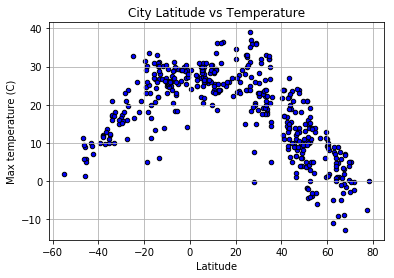

In [19]:
# Plot Temperature (F) vs. Latitude
temp_vs_lat = new_random_cities_df.plot(kind="scatter",
                                        x="Latitude",
                                        y="Temperature",
                                        color="blue",
                                        edgecolor="black",
                                        grid=True)
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (C)")
plt.savefig('C:/Users/CAEAIZPU/OneDrive - kochind.com/Desktop/API HW/LatVsTemp.png')
plt.show()

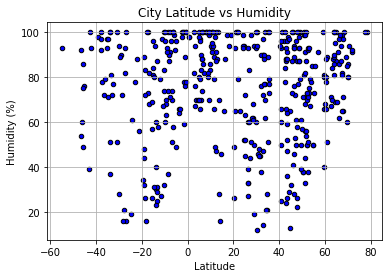

In [16]:
# Plot Humidity (%) vs. Latitude
humid_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Humidity",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('C:/Users/CAEAIZPU/OneDrive - kochind.com/Desktop/API HW/LatVsHumidity.png')
plt.show()

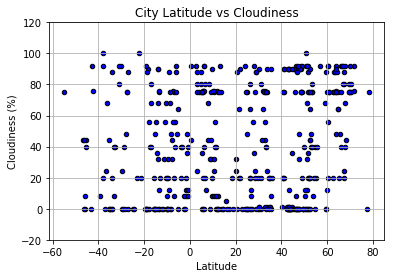

In [17]:
# Plot Cloudiness (%) vs. Latitude
cloud_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Cloudiness",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-20, 120)
plt.savefig('C:/Users/CAEAIZPU/OneDrive - kochind.com/Desktop/API HW/LatVsCloudiness.png')
plt.show()

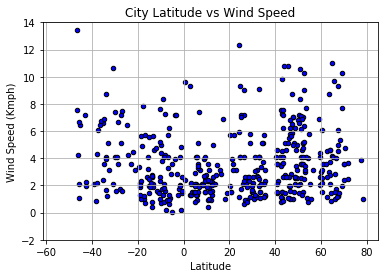

In [20]:
# Plot Wind Speed (mph) vs. Latitude
windspeed_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Wind Speed",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Kmph)")
plt.ylim(-2, 14)
plt.savefig('C:/Users/CAEAIZPU/OneDrive - kochind.com/Desktop/API HW/LatVsWindSpeed.png')
plt.show()

In [ ]:
# Observations:
# 1. Latitud Zero (0) are the cities located near the equator. This means, are tropical cities and their temperatures are higher that 
# the temperature in cities with latitudes from 40 to 60 like northern Europe.

# 2. Humity vs Latitud does not show a clear trend or correlation. The data looks scattered. However, it seems to
# to show a denser cluster for latitu Zero and between 60 and 80 with higher humidities (60 to 100%)

# 3. Cloudiness does not show a clear pattern or behavior. Cloudiness around latitud 80 withbonly two records show either 
# 80% cloudiness or 0%. Not conclusive in my opinion

# 4. Wind speed does not show depency on latitud. I see higher averages for cities with latitude between 40 to 60.
# in general, wind speeds are between 0 and 8 al accross the latitude range.